In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

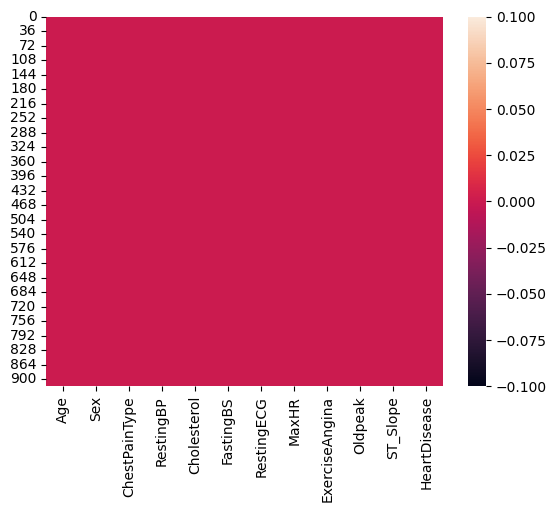

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

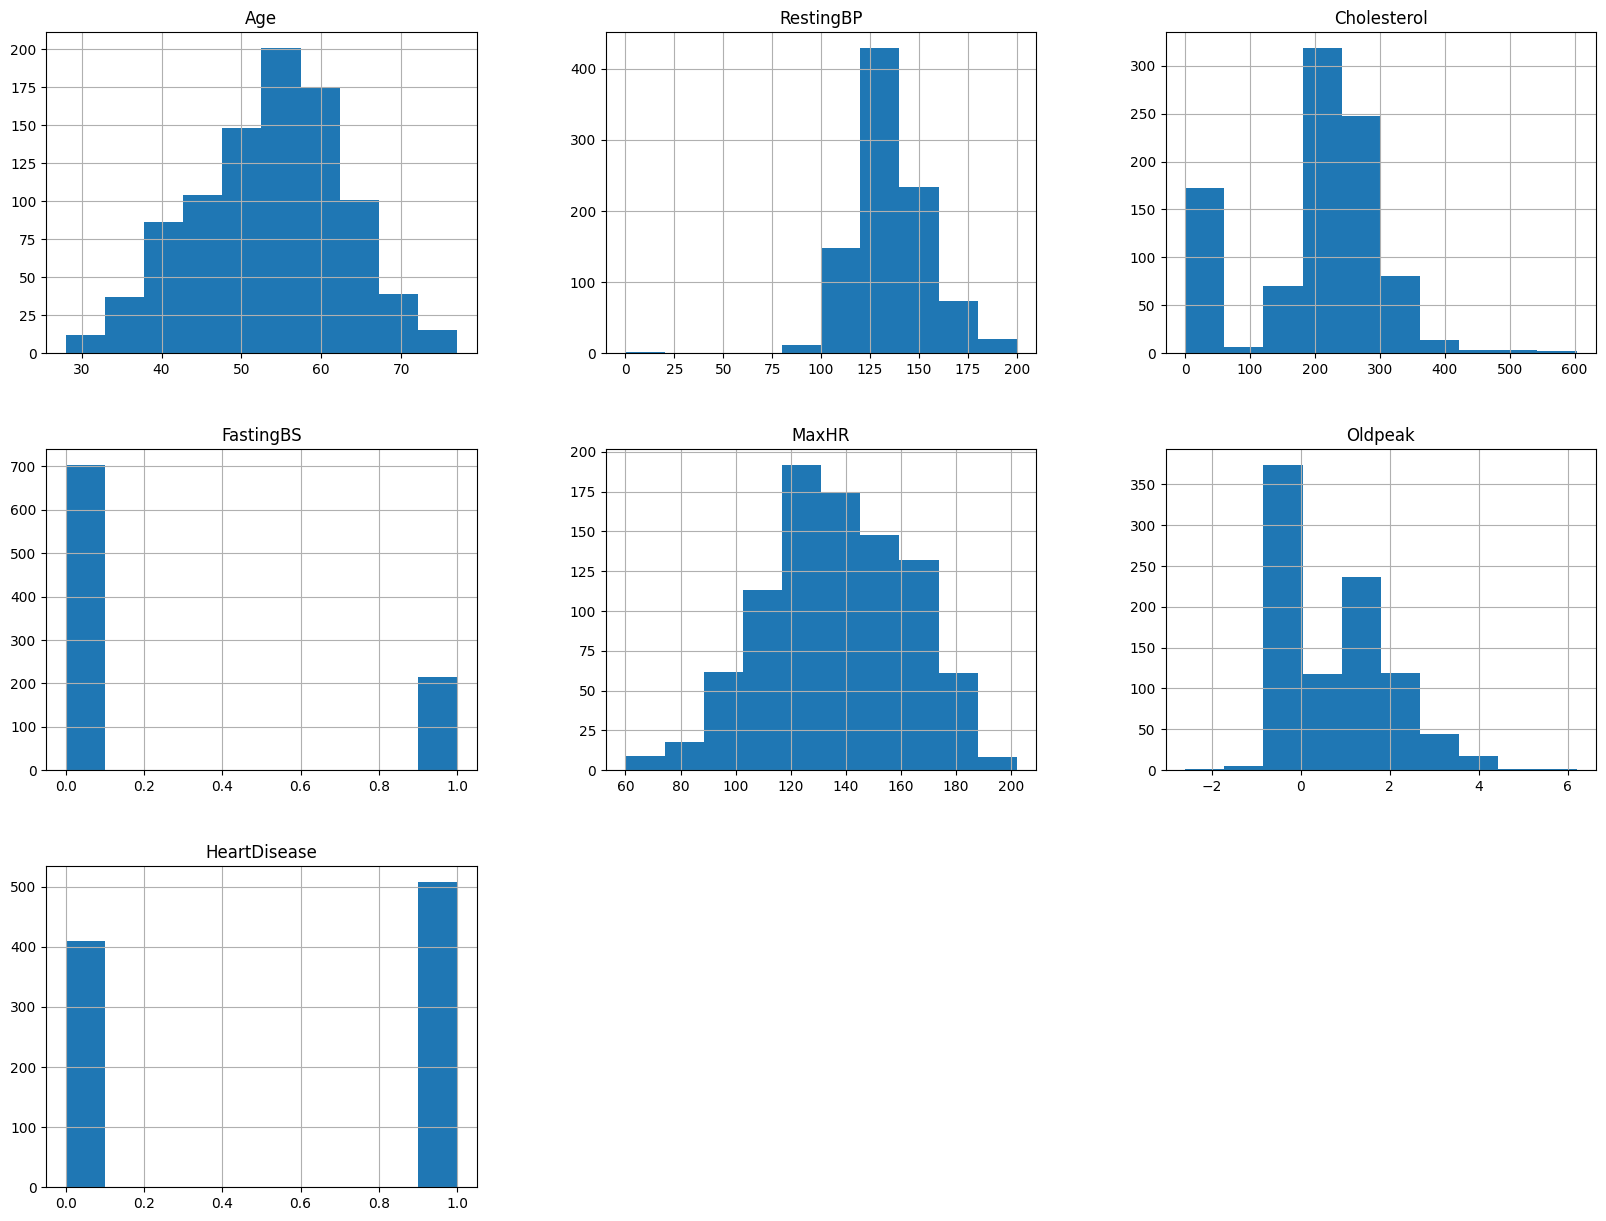

In [12]:
df.hist(figsize=(20,15))
plt.show()

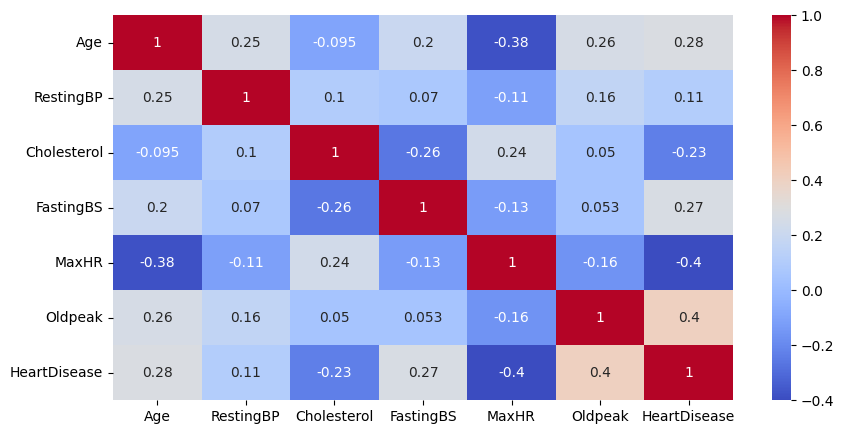

In [13]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True , cmap="coolwarm")
plt.show()

Processing Data 

In [14]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [15]:
obj = df.select_dtypes(include='object')  
non_obj = df.select_dtypes(exclude='object')

In [16]:
for i in range(0 , obj.shape[1]):
    obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])

In [17]:
df = pd.concat([obj , non_obj] , axis=1)


In [18]:
df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1


Model Creation

In [19]:
x=df.drop(['HeartDisease'],axis=1)
y=df.HeartDisease

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [21]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train , y_train)

LogisticRegression(max_iter=10000)

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8514851485148515


In [24]:
model = SVC()
model.fit(X_train , y_train)

SVC()

In [25]:
y_pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.7194719471947195


In [27]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.6897689768976898


In [30]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8712871287128713


In [33]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8316831683168316


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.8811881188118812


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)


Best parameters: {'max_depth': 3, 'n_estimators': 50}


In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model
_, accuracy_nn = model.evaluate(X_test_scaled, y_test)
print("Neural Network Accuracy:", accuracy_nn)


Epoch 1/500
20/20 [==============================] - 3s 28ms/step - loss: 0.5985 - accuracy: 0.7171 - val_loss: 0.5251 - val_accuracy: 0.8284
Epoch 2/500
20/20 [==============================] - 0s 8ms/step - loss: 0.4982 - accuracy: 0.8000 - val_loss: 0.4436 - val_accuracy: 0.8449
Epoch 3/500
20/20 [==============================] - 0s 7ms/step - loss: 0.4540 - accuracy: 0.8130 - val_loss: 0.4054 - val_accuracy: 0.8449
Epoch 4/500
20/20 [==============================] - 0s 13ms/step - loss: 0.4152 - accuracy: 0.8260 - val_loss: 0.3800 - val_accuracy: 0.8482
Epoch 5/500
20/20 [==============================] - 0s 12ms/step - loss: 0.4037 - accuracy: 0.8407 - val_loss: 0.3590 - val_accuracy: 0.8548
Epoch 6/500
20/20 [==============================] - 0s 18ms/step - loss: 0.3907 - accuracy: 0.8488 - val_loss: 0.3592 - val_accuracy: 0.8482
Epoch 7/500
20/20 [==============================] - 0s 13ms/step - loss: 0.3884 - accuracy: 0.8374 - val_loss: 0.3537 - val_accuracy: 0.8515
Epoch 8/

In [39]:
from sklearn.feature_selection import RFE

selector = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=8)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

rf_model.fit(X_train_selected, y_train)
print("Accuracy after feature selection:", accuracy_score(y_test, rf_model.predict(X_test_selected)))


Accuracy after feature selection: 0.8448844884488449


In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape data to fit Conv1D input shape
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate
_, accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Model Accuracy:", accuracy_cnn)


Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.5701 - accuracy: 0.7756 - val_loss: 0.4156 - val_accuracy: 0.8482
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4245 - accuracy: 0.8407 - val_loss: 0.3391 - val_accuracy: 0.8713
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3801 - accuracy: 0.8488 - val_loss: 0.3379 - val_accuracy: 0.8680
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3821 - accuracy: 0.8455 - val_loss: 0.3358 - val_accuracy: 0.8746
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3603 - accuracy: 0.8634 - val_loss: 0.3318 - val_accuracy: 0.8746
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3452 - accuracy: 0.8602 - val_loss: 0.3307 - val_accuracy: 0.8680
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3419 - accuracy: 0.8667 - val_loss: 0.3161 - val_accuracy: 0.8746
Epoch 8/100


In [41]:
from tensorflow.keras.layers import LSTM, Reshape

lstm_model = Sequential([
    Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate
_, accuracy_lstm = lstm_model.evaluate(X_test_scaled, y_test)
print("LSTM Model Accuracy:", accuracy_lstm)


Epoch 1/100
20/20 [==============================] - 4s 58ms/step - loss: 0.6938 - accuracy: 0.5203 - val_loss: 0.6876 - val_accuracy: 0.5941
Epoch 2/100
20/20 [==============================] - 1s 33ms/step - loss: 0.6909 - accuracy: 0.5333 - val_loss: 0.6834 - val_accuracy: 0.5941
Epoch 3/100
20/20 [==============================] - 1s 29ms/step - loss: 0.6868 - accuracy: 0.5333 - val_loss: 0.6793 - val_accuracy: 0.5941
Epoch 4/100
20/20 [==============================] - 1s 33ms/step - loss: 0.6846 - accuracy: 0.5252 - val_loss: 0.6811 - val_accuracy: 0.5941
Epoch 5/100
20/20 [==============================] - 1s 32ms/step - loss: 0.6824 - accuracy: 0.5756 - val_loss: 0.6789 - val_accuracy: 0.6106
Epoch 6/100
20/20 [==============================] - 1s 33ms/step - loss: 0.6777 - accuracy: 0.5480 - val_loss: 0.6761 - val_accuracy: 0.6040
Epoch 7/100
20/20 [==============================] - 1s 31ms/step - loss: 0.6785 - accuracy: 0.5902 - val_loss: 0.6752 - val_accuracy: 0.6073
Epoch 

In [42]:
import numpy as np

# Convert Data to Float32 (Fix the error)
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define AutoEncoder
input_dim = X_train.shape[1]
encoding_dim = 8  

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile & Train AutoEncoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Extract Features and Train DNN
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Train DNN on Encoded Features
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

dnn = Sequential([
    Dense(64, activation='relu', input_shape=(encoding_dim,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn.fit(X_train_encoded, y_train, epochs=100, validation_data=(X_test_encoded, y_test))

# Evaluate Model
_, accuracy_dnn = dnn.evaluate(X_test_encoded, y_test)
print("DNN with AutoEncoder Accuracy:", accuracy_dnn)


Epoch 1/100
20/20 [==============================] - 0s 8ms/step - loss: 8377.9336 - val_loss: 8137.6904
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 8355.3975 - val_loss: 8130.9629
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 8350.8760 - val_loss: 8127.0991
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 8347.9922 - val_loss: 8125.4019
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 8346.7549 - val_loss: 8124.5503
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 8345.6191 - val_loss: 8123.2954
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 8343.5176 - val_loss: 8120.4546
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 8338.7666 - val_loss: 8113.8071
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 8329.4170 - val_loss: 8103.1714
Epoch 10/100
20/20 [==============================] - 0

In [43]:
from tensorflow.keras.layers import Conv1D, Flatten

# Define CNN + DNN Hybrid Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile and Train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=100, validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test))

# Evaluate
_, accuracy_cnn = model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)
print("CNN + DNN Accuracy:", accuracy_cnn)


Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 3.8466 - accuracy: 0.5301 - val_loss: 1.2871 - val_accuracy: 0.5017
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.2960 - accuracy: 0.5561 - val_loss: 0.6944 - val_accuracy: 0.5974
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.9245 - accuracy: 0.5528 - val_loss: 0.5848 - val_accuracy: 0.6832
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6309 - val_loss: 0.5850 - val_accuracy: 0.6997
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6713 - accuracy: 0.6081 - val_loss: 0.5844 - val_accuracy: 0.7426
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.6506 - accuracy: 0.6309 - val_loss: 0.5549 - val_accuracy: 0.7294
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6267 - accuracy: 0.6569 - val_loss: 0.5796 - val_accuracy: 0.7261
Epoch 8/10

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("data/heart.csv")

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split data
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Feature Selection with RFE (Recursive Feature Elimination)
base_estimator = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=base_estimator, n_features_to_select=8)  # Selecting top 8 features
X_selected = rfe.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Optimized SVM with GridSearchCV
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_model.fit(X_train, y_train)
best_svm = svm_model.best_estimator_

# ✅ FIX: Use "estimator" instead of "base_estimator"
bagging_svm = BaggingClassifier(estimator=best_svm, n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

# Predict & Evaluate
svm_pred = bagging_svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Enhanced SVM Accuracy with Feature Selection & Ensemble Learning: {svm_acc * 100:.2f}%")


Enhanced SVM Accuracy with Feature Selection & Ensemble Learning: 84.78%


Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 0.6354 - accuracy: 0.6649 - val_loss: 0.5885 - val_accuracy: 0.7826
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4585 - accuracy: 0.7916 - val_loss: 0.5288 - val_accuracy: 0.8261
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4395 - accuracy: 0.8106 - val_loss: 0.4837 - val_accuracy: 0.8261
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8202 - val_loss: 0.4519 - val_accuracy: 0.8315
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3945 - accuracy: 0.8243 - val_loss: 0.4265 - val_accuracy: 0.8370
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3642 - accuracy: 0.8447 - val_loss: 0.4021 - val_accuracy: 0.8478
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3743 - accuracy: 0.8392 - val_loss: 0.3831 - val_accuracy: 0.8587
Epoch 8/100


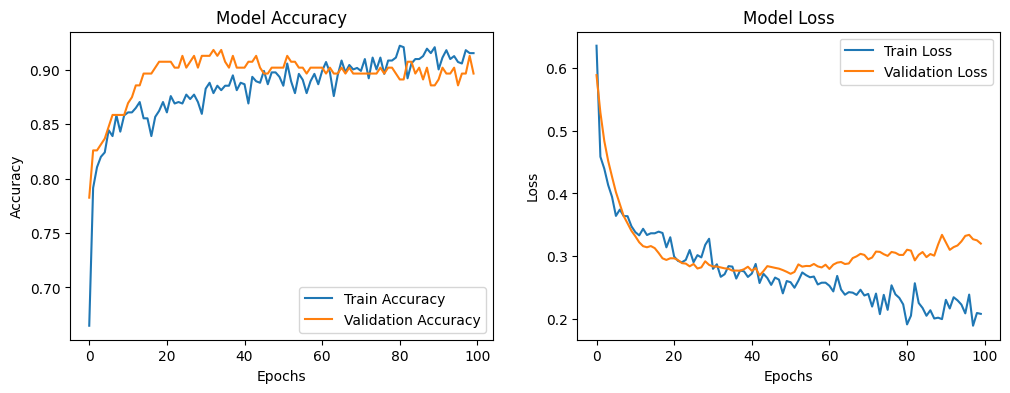

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Load dataset
df = pd.read_csv("data/heart.csv")

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split data
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save scaler for later use
import joblib
joblib.dump(scaler, "scaler.pkl")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build deep learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Save model
model.save("heart_disease_model.h5")

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


import matplotlib.pyplot as plt

# Load the training history from the previous cell
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")

# Show plot
plt.show()
